# Personal preprocessing
* product_category
* product_subcategory 
* product_modelname 

In [28]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df_train = pd.read_csv("../train.csv") # 학습용 데이터
df_test = pd.read_csv("../submission.csv") # 테스트 데이터(제출파일의 데이터)

# 데이터 계수 파악
len(df_train), len(df_test)
df_train = df_train.fillna('Unknown')

## 신규 Columns 추가
---
* 밴 다이어그램을 통한 분류화
* 사람의 관심도를 표현하기 위해서 `customer_interest`로 명명.


In [2]:
def label_rows(row):
    if row['product_modelname'] is np.nan and row['product_subcategory'] is np.nan and row['product_category'] is np.nan:
        return 8
    elif row['product_modelname'] is np.nan and row['product_subcategory'] is np.nan:
        return 7
    elif row['product_modelname'] is np.nan and row['product_category'] is np.nan:
        return 6
    elif row['product_subcategory'] is np.nan and row['product_category'] is np.nan:
        return 5
    elif row['product_modelname'] is np.nan:
        return 4
    elif row['product_subcategory'] is np.nan:
        return 3
    elif row['product_category'] is np.nan:
        return 2
    else:
        return 1

df_train['customer_interest'] = df_train.apply(lambda row: label_rows(row), axis=1)


## 결과

In [3]:
df_train.groupby('customer_interest')['is_converted'].mean()

customer_interest
1    0.147267
2    0.087719
3    0.102041
4    0.145729
5    0.005242
6    0.117021
7    0.076323
8    0.064555
Name: is_converted, dtype: float64

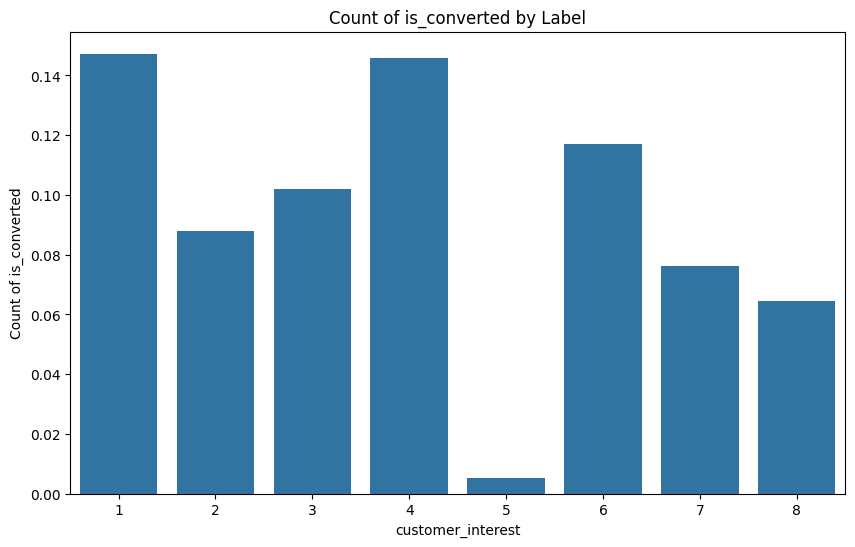

In [4]:
label_converted_count = df_train.groupby('customer_interest')['is_converted'].mean().reset_index()

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_interest', y='is_converted', data=label_converted_count)
plt.xlabel('customer_interest')
plt.ylabel('Count of is_converted')
plt.title('Count of is_converted by Label')
plt.show()

## product_category 정리
* LG BTB 마케팅의 입력 양식을 참고
* 종류

In [5]:
data =  df_train[['product_category', 'is_converted']]
data['product_category'].value_counts()

product_category
interactive digital board                     6154
vrf                                           5640
multi-split                                   3674
video wall signage                            2029
etc.                                          2018
                                              ... 
system ac                                        1
sac                                              1
gscd046                                          1
43uh5f-h.awzm                                    1
monior/monitor tv,refrigerator,audio/video       1
Name: count, Length: 357, dtype: int64

In [6]:
data = data.fillna('Unknown')

In [7]:
def set_up(mode= None):
    pd.set_option('display.max_rows', mode)
# pd.options.display.max_rows = 60
set_up()

In [70]:
data['product_category'] = data['product_category'].str.lower().str.strip()
pd.DataFrame(data['product_category'].value_counts())

,count
product_category,
unknown,19374
interactive digital board,8061
vrf,5640
multi-split,3931
video wall signage,2144
etc.,2047
led signage,1910
single-split,1569
rac,1508


* interactive signage = interactive digitalborad
* rac가 안보이니깐 일단 패스
* accessories : 일일히 분해 필요.
* technical support	: 기술적 지원...? 그리고 services 비슷한 국가에서 행동,

## 같은 Category의 경우 대체

In [68]:
data['product_category'] = data['product_category'].replace('interactive signage', 'interactive digital board')
data['product_category'] = data['product_category'].replace('education createboard', 'interactive digital board')
data['product_category'] = data['product_category'].replace('multi inverter', 'multi-split')
data['product_category'] = data['product_category'].replace('video wall', 'video wall signage')
data['product_category'] = data['product_category'].replace('videowall_rmk', 'video wall signage')
data['product_category'] = data['product_category'].replace('43us660h0sd.awz	', 'hotel tv')
data['product_category'] = data['product_category'].replace('high brightness', 'high brightness signage')
data['product_category'] = data['product_category'].replace('residential air conditioner', 'rac')
data['product_category'] = data['product_category'].replace('aire acondicionado residencial	', 'rac')
data['product_category'] = data['product_category'].replace('all lg vrf systems	', 'vrf')
data['product_category'] = data['product_category'].replace('ur640', 'ur640s')
data['product_category'] = data['product_category'].replace('idb', 'interactive digital board')
data['product_category'] = data['product_category'].replace('others', 'etc.')
data['product_category'] = data['product_category'].replace('other', 'etc.')
data['product_category'] = data['product_category'].replace('commercial tv,tv', 'commercial tv')
data['product_category'] = data['product_category'].replace('onequick series', 'lg one:quick series')
data['product_category'] = data['product_category'].replace('led 顯示屏', 'led signage')
data['product_category'] = data['product_category'].replace('32lq621cbsb.awz', 'smart tv signage')
data['product_category'] = data['product_category'].replace('monior/monitor tv,tv', 'monitor signage,monior/monitor tv')
data['product_category'] = data['product_category'].replace('isıtma', 'heating')

In [69]:
cate_num_dict = {
    0 : 'commercial_display',
    1 : 'hvac',
    2 : 'it_products',
    -1 : 'non_serviced',
}


cate_dict  = {
    'interactive digital board' : 0,
    'vrf' : 1,
    'multi-split' : 1,
    'video wall signage': 0,
    'led signage' : 0,
    'single-split' : 1,
    'oled signage' : 0,
    'hotel tv' : 0,
    'chiller' : 1,
    'standard signage' : 0,
    'medical display' : 2,
    'lg one:quick series' : 0,
    'heating' : 1,
    'high brightness signage' : 0,
    'ventilation' : 0,
    'teto ou cassete inverter' : 1,
    'control' : -1,
    'rac' : 1,
    'ar condicionado residencial' : 1,
    'software solution' : 0,
    'special signage' : 0,
    'hospital tv' : 0,
    'webos' : 0,
    'pc' : 2,
    'pro:centric' : 0,
    'projector' : 2,
    'commercial display' : 0,
    'ur640s' : 0,
    'outros' : 1,
    'signage care solution' : 0,
    'multi v 5 air' : 1,
    'smart tv signage' : 0,
    'cloud device' : 2,
    'medical displays' : 2,
    'laptop' : 2,
    'a thermodynamic water heater' : 1,
    'monitor signage,monior/monitor tv' : 2,
    'uhd signage' : 0,
    'virtual production' :  0,
    'ogrzewanie (pompy ciepła)' : 1,
    'commercial tv' : 0,
    'digital signage' : 0,
    'solar,ess': 1,
    'ledallinone' : 0,
    '28mq780' : 2,
    'tv' : 0,
    'multi v water 5' : 1,
}

subcate_dict = {
    'interactive digital board' : 'digital_signage',
    'vrf' : 'commercial_solutions',
    'multi-split' : 'multi_split',
    'video wall signage' : 'digital_signage',
    'led signage' : 'led_signage',
    'single-split' : 'commercial_solutions',
    'oled signage' : 'oled_signage',
    'hotel tv' : 'commercial_tv',
    'chiller' : 'commercial_solutions',
    'standard signage' : 'digital_signage',
    'medical display' : 'medical_display',
    'lg one:quick series' : 'digital_signage',
    'heating': 'residential_solutions',
    'high brightness signage' : 'digital_signage',
    'ventilation' : 'commercial_solutions',
    'teto ou cassete inverter' : 'commercial_solutions',
    'control' : 'non_serviced',
    'ar condicionado residencial' : 'residential_solutions',
    'rac' : 'residential_solutions',
    'software solution' : 'software',
    'special signage' : 'digital_signage',
    'hospital tv' : 'commercial_tv',
    'webos' : 'software',
    'pro:centric': 'commercial_tv',
    'projector' : 'projector',
    'ur640s' : 'digital_signage',
    'outros' : 'residential_solutions',
    'signage care solution' : 'software',
    'multi v 5 air' : 'commercial_solutions',
    'smart tv signage' : 'commercial_tv',
    'cloud device' : 'cloud_device',
    'medical displays' : 'medical displays',
    'laptop' : 'laptop',
    'a thermodynamic water heater' : 'residential_solutions',
    'monitor signage,monior/monitor tv' : 'monitor',
    'uhd signage' : 'digital_signage',
    'virtual production' : 'led_signage',
    'commercial tv' : 'commercial_tv',
    'digital signage' : 'digital_signage',
    'solar,ess' : 'ess',
    'ledallinone' : 'led_signage',
    '28mq780' : 'monitor',
    'multi v water 5' : 'commercial_solutions',
}

subsubcate_dict = {
    'interactive digital board' : 'interactive',
    'video wall signage' : 'video_wall',
    'single split' : 'single_split',
    'chiller' : 'chiller',
    'standard signage' : 'standard',
    'lg one:quick series' : 'one:quick',
    'ventilation' : 'commercial erv ventilation',
    'teto ou cassete inverter' : 'single_split',
    'control' : 'non_serviced',
    'software solution' : 'supersign_software',
    'special signage' : 'special',
    'hotel tv' : 'hospitality_tv',
    'hospital tv' : 'hospitality_tv',
    'webos' : 'webos',
    'pro:centric' : 'hospitality_tv',
    'ur640s' : 'standard',
    'signage care solution' : 'signage_care_solution',
    'smart tv signage' : 'hospitality_tv',
    'uhd signage' : 'uhd_sinange',
    'virtual production' : 'virtual_production',
    'multi v 5 air' : 'vrf_system',
    'vrf' : 'vrf_system',
    'outros' : 'air_to_water_heat_pumps',
    'laptop' : 'gram',
    'ogrzewanie (pompy ciepła)' : 'air_to_water_heat_pumps',
    'ledallinone' : 'all_in_one',
    '28mq780' : 'ultrawide',
    'multi v water 5' : 'vrf_system',
    'heating': 'air_to_water_heat_pumps',
    'a thermodynamic water heater' : 'water_heater',
}



In [74]:
cond1 = (df_train['product_category'] == 'vrf,multi-split,single-split,chiller')# & (df_train['product_subcategory'] != 'Unknown')
df_train[cond1]#[['customer_country','product_category', 'product_subcategory', 'product_modelname', 'is_converted']]

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
45692,1.00,/Pasig City/Philippines,AS,Unknown,1815,Unknown,SMB,1.0,Unknown,Unknown,...,LGEPH,3 months ~ 6 months,0,0,Unknown,Unknown,Unknown,Unknown,83,True
45809,0.50,#314 G. Araneta Ave. Quezon City NCR /Caloocan...,AS,Unknown,7053,Specifier/ Influencer,Enterprise,Unknown,Unknown,Unknown,...,LGEPH,Unknown,0,0,Unknown,Unknown,Unknown,Unknown,16,True
47116,0.50,/Sofia/Bulgaria,AS,Unknown,11279,Unknown,SMB,Unknown,Unknown,Unknown,...,LGEMK,Unknown,0,0,Unknown,Unknown,Unknown,Unknown,710,False
47682,0.75,/METRO MANILA/ QUEZON CITY/Philippines,AS,Unknown,1455,Unknown,SMB,7.0,Unknown,Unknown,...,LGEPH,less than 3 months,0,0,Unknown,Unknown,Unknown,Unknown,47,True
47684,0.50,"j.p.laurel ave., davao city /Davao City/Phili...",AS,Unknown,36062,Specifier/ Influencer,Enterprise,Unknown,Unknown,Unknown,...,LGEPH,Unknown,0,0,Unknown,Unknown,Unknown,Unknown,599,True
57525,0.75,/Davao City/Philippines,AS,0.022727,96,Unknown,Enterprise,Unknown,Unknown,Unknown,...,LGEPH,more than a year,0,0,0.001183,0.011583,retail,Unknown,599,True


In [ ]:
cond1 = (df_train['product_category'] == 'technical support')# & (df_train['product_subcategory'] != 'Unknown')
df_train[cond1][['customer_country','product_category', 'product_subcategory', 'product_modelname', 'is_converted']]